In [2]:
%reload_kedro

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


[02/24/23 22:02:12] INFO     Resolved project path as:                                              ]8;id=41199;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=599600;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#132\132]8;;\
                             /home/carlos/Projects/jornada_tecnica_DS/elections-mlops-project.                     
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/24/23 22:02:17] INFO     Kedro project elections_mlops_project                                  ]8;id=862175;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=959352;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#101\101]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=914214;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=105323;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#102\102]8;;\
                             'pipelines'                                                                           

In [3]:
catalog.list()

[
    'raw_data',
    'preprocessed_data',
    'data',
    'X_train',
    'X_test',
    'y_train',
    'y_test',
    'final_data',
    'parameters'
]

In [5]:
# load the data into a pandas DataFrame

data = catalog.load("raw_data")


[02/24/23 22:02:39] INFO     Loading data from 'raw_data' (CSVDataSet)...                       ]8;id=849502;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=142457;file:///home/carlos/Projects/jornada_tecnica_DS/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [6]:
# check the first five lines

data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [7]:
# check the last five lines

data.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [8]:
data.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

In [9]:
# gets descriptive statistics

data.describe(include=["float64", "int64"])

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [10]:
data.describe(exclude=["float64", "int64"])

,time,territoryName,Party
count,21643,21643,21643
unique,54,21,21
top,2019-10-06 22:25:01,Território Nacional,PS
freq,403,1134,1127


In [11]:
# check for missing values

print(data.isnull().sum())

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64


In [12]:
# Changes the type of the "time" column

# data['time'] = pd.to_datetime(data['time'])

In [13]:
# Checking correlation of all columns with the target column
data_ = data.select_dtypes(include=['float64', 'int64'])
data_.corr()['FinalMandates']

TimeElapsed                -0.001007
totalMandates               0.264117
availableMandates           0.266764
numParishes                 0.329009
numParishesApproved         0.312177
blankVotes                  0.295583
blankVotesPercentage       -0.001195
nullVotes                   0.298663
nullVotesPercentage        -0.029659
votersPercentage            0.061048
subscribedVoters            0.295555
totalVoters                 0.294490
pre.blankVotes              0.294866
pre.blankVotesPercentage    0.005716
pre.nullVotes               0.297482
pre.nullVotesPercentage    -0.038686
pre.votersPercentage        0.050450
pre.subscribedVoters        0.296428
pre.totalVoters             0.295169
Mandates                    0.814370
Percentage                  0.383086
validVotesPercentage        0.382744
Votes                       0.882502
Hondt                       0.994480
FinalMandates               1.000000
Name: FinalMandates, dtype: float64

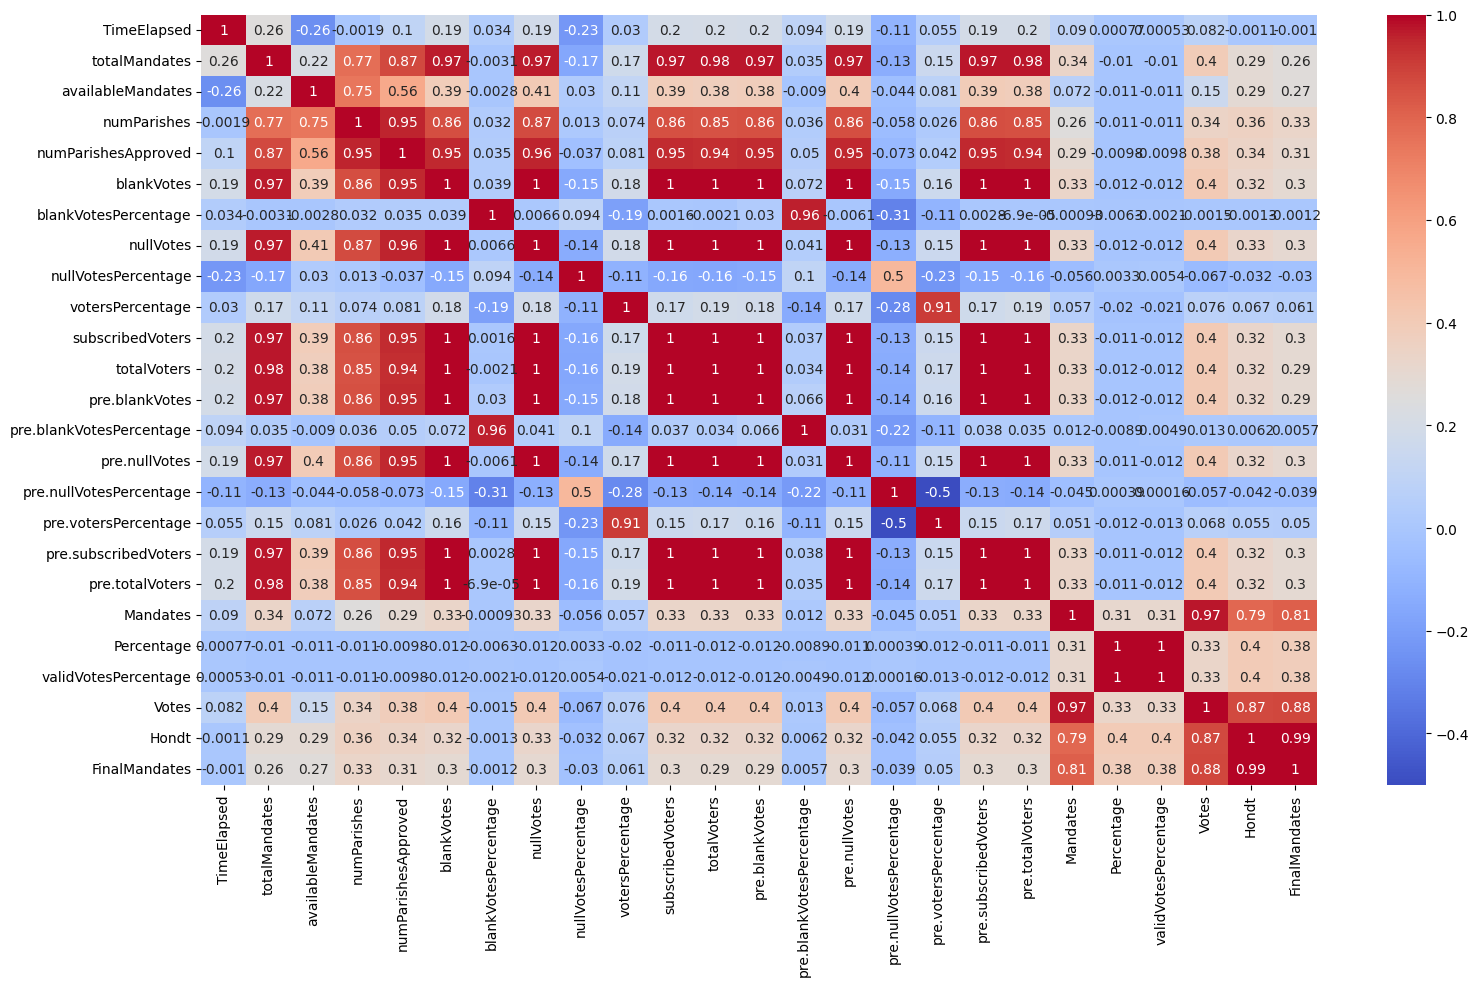

In [14]:
plt.figure(figsize=(18,10))
data_ = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(data_.corr(),cmap='coolwarm',annot=True);

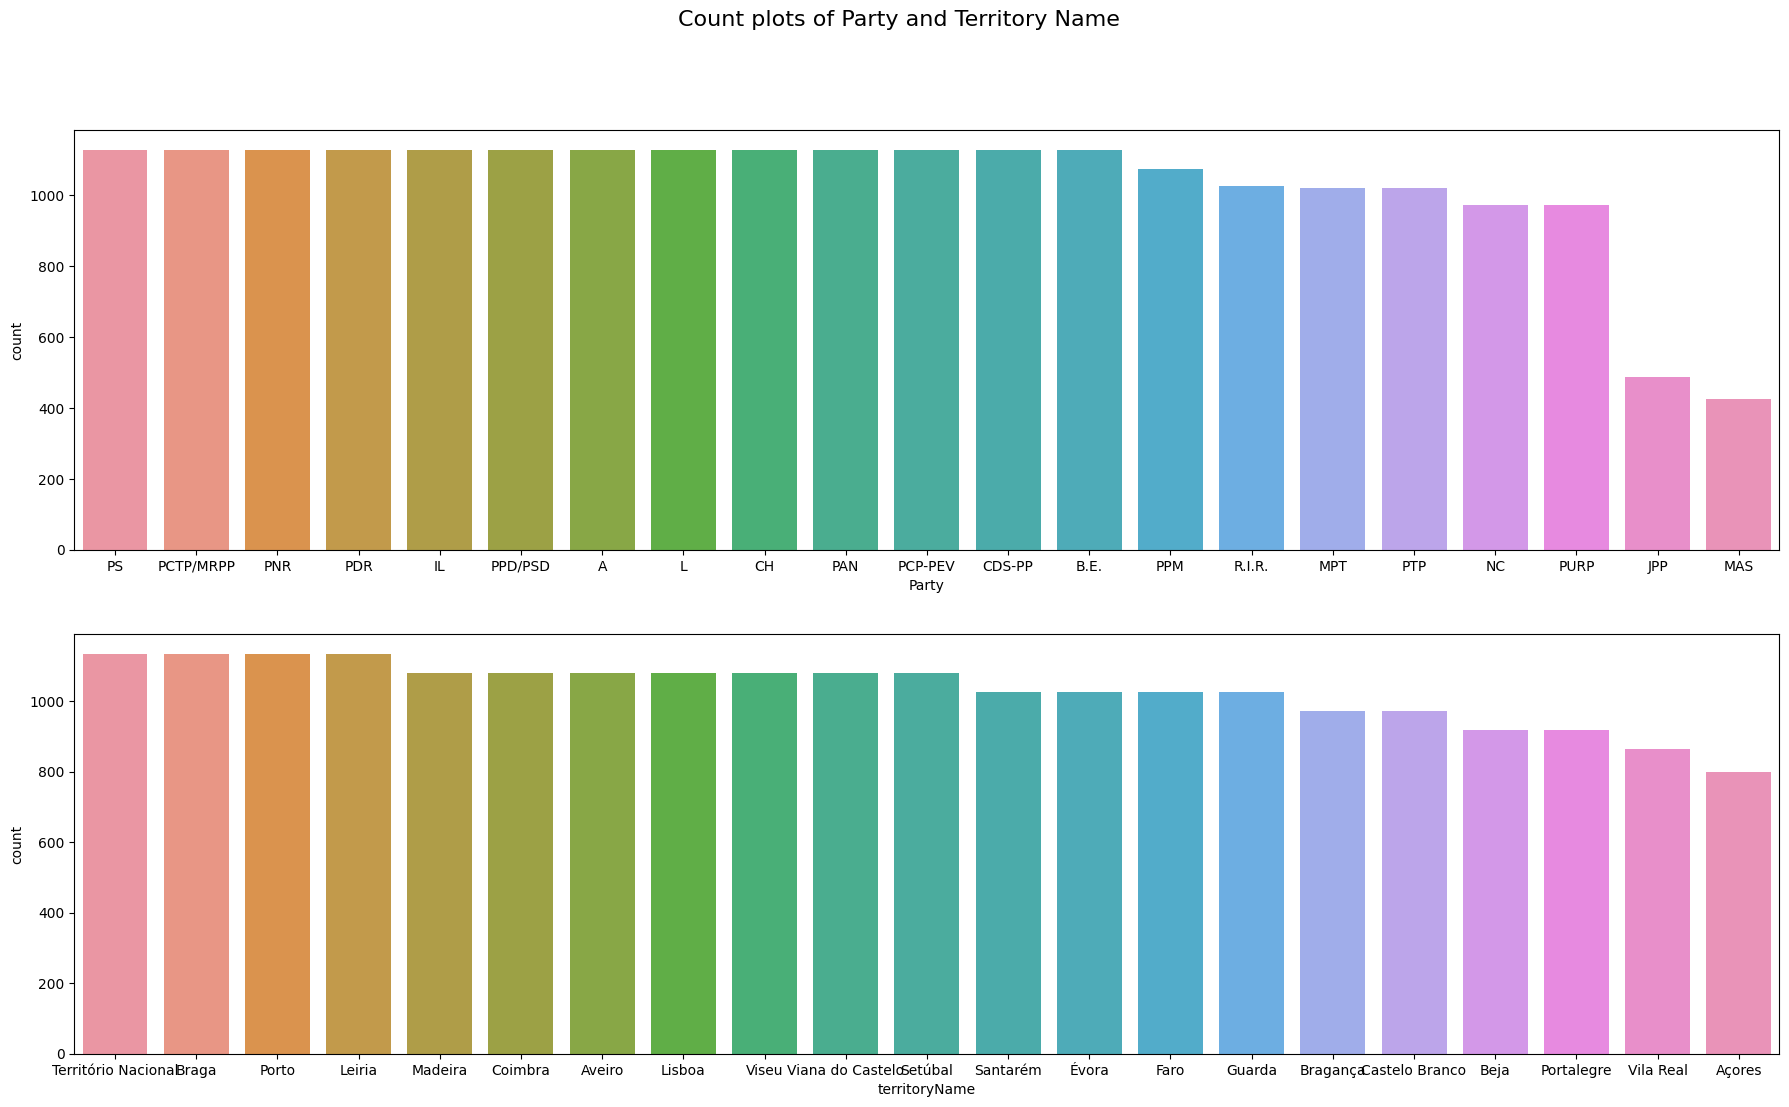

In [15]:
cols = ["Party", "territoryName"]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=[22, 12])

countplots = [sns.countplot(x=col, data=data, ax=ax, order=data[col].value_counts().index) for col, ax in zip(cols, (ax1, ax2))]

fig.suptitle("Count plots of Party and Territory Name", fontsize=16)

plt.show()

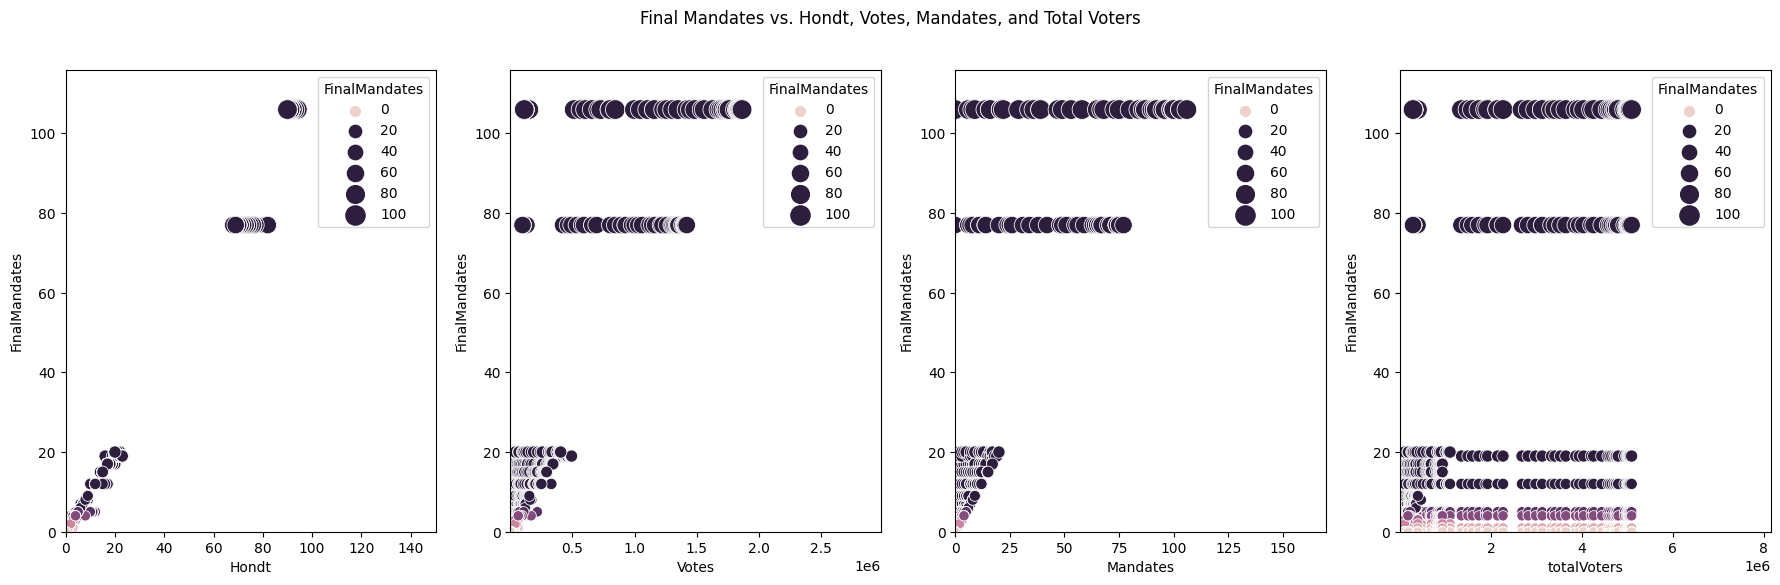

In [16]:
cols = ["Hondt", "Votes", "Mandates", "totalVoters"]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[22, 6])

scatterplots = [sns.scatterplot(x=col, y="FinalMandates", data=data, hue="FinalMandates", size="FinalMandates", sizes=(50, 200), hue_norm=(0, 6), ax=ax) for col, ax in zip(cols, axes)]
for i, scatterplot in enumerate(scatterplots):
    scatterplot.set_xlim([data[cols[i]].min(), data[cols[i]].max()*1.6])
    scatterplot.set_ylim([data["FinalMandates"].min(), data["FinalMandates"].max()+10])

fig.suptitle("Final Mandates vs. Hondt, Votes, Mandates, and Total Voters", fontsize=12)

plt.show()


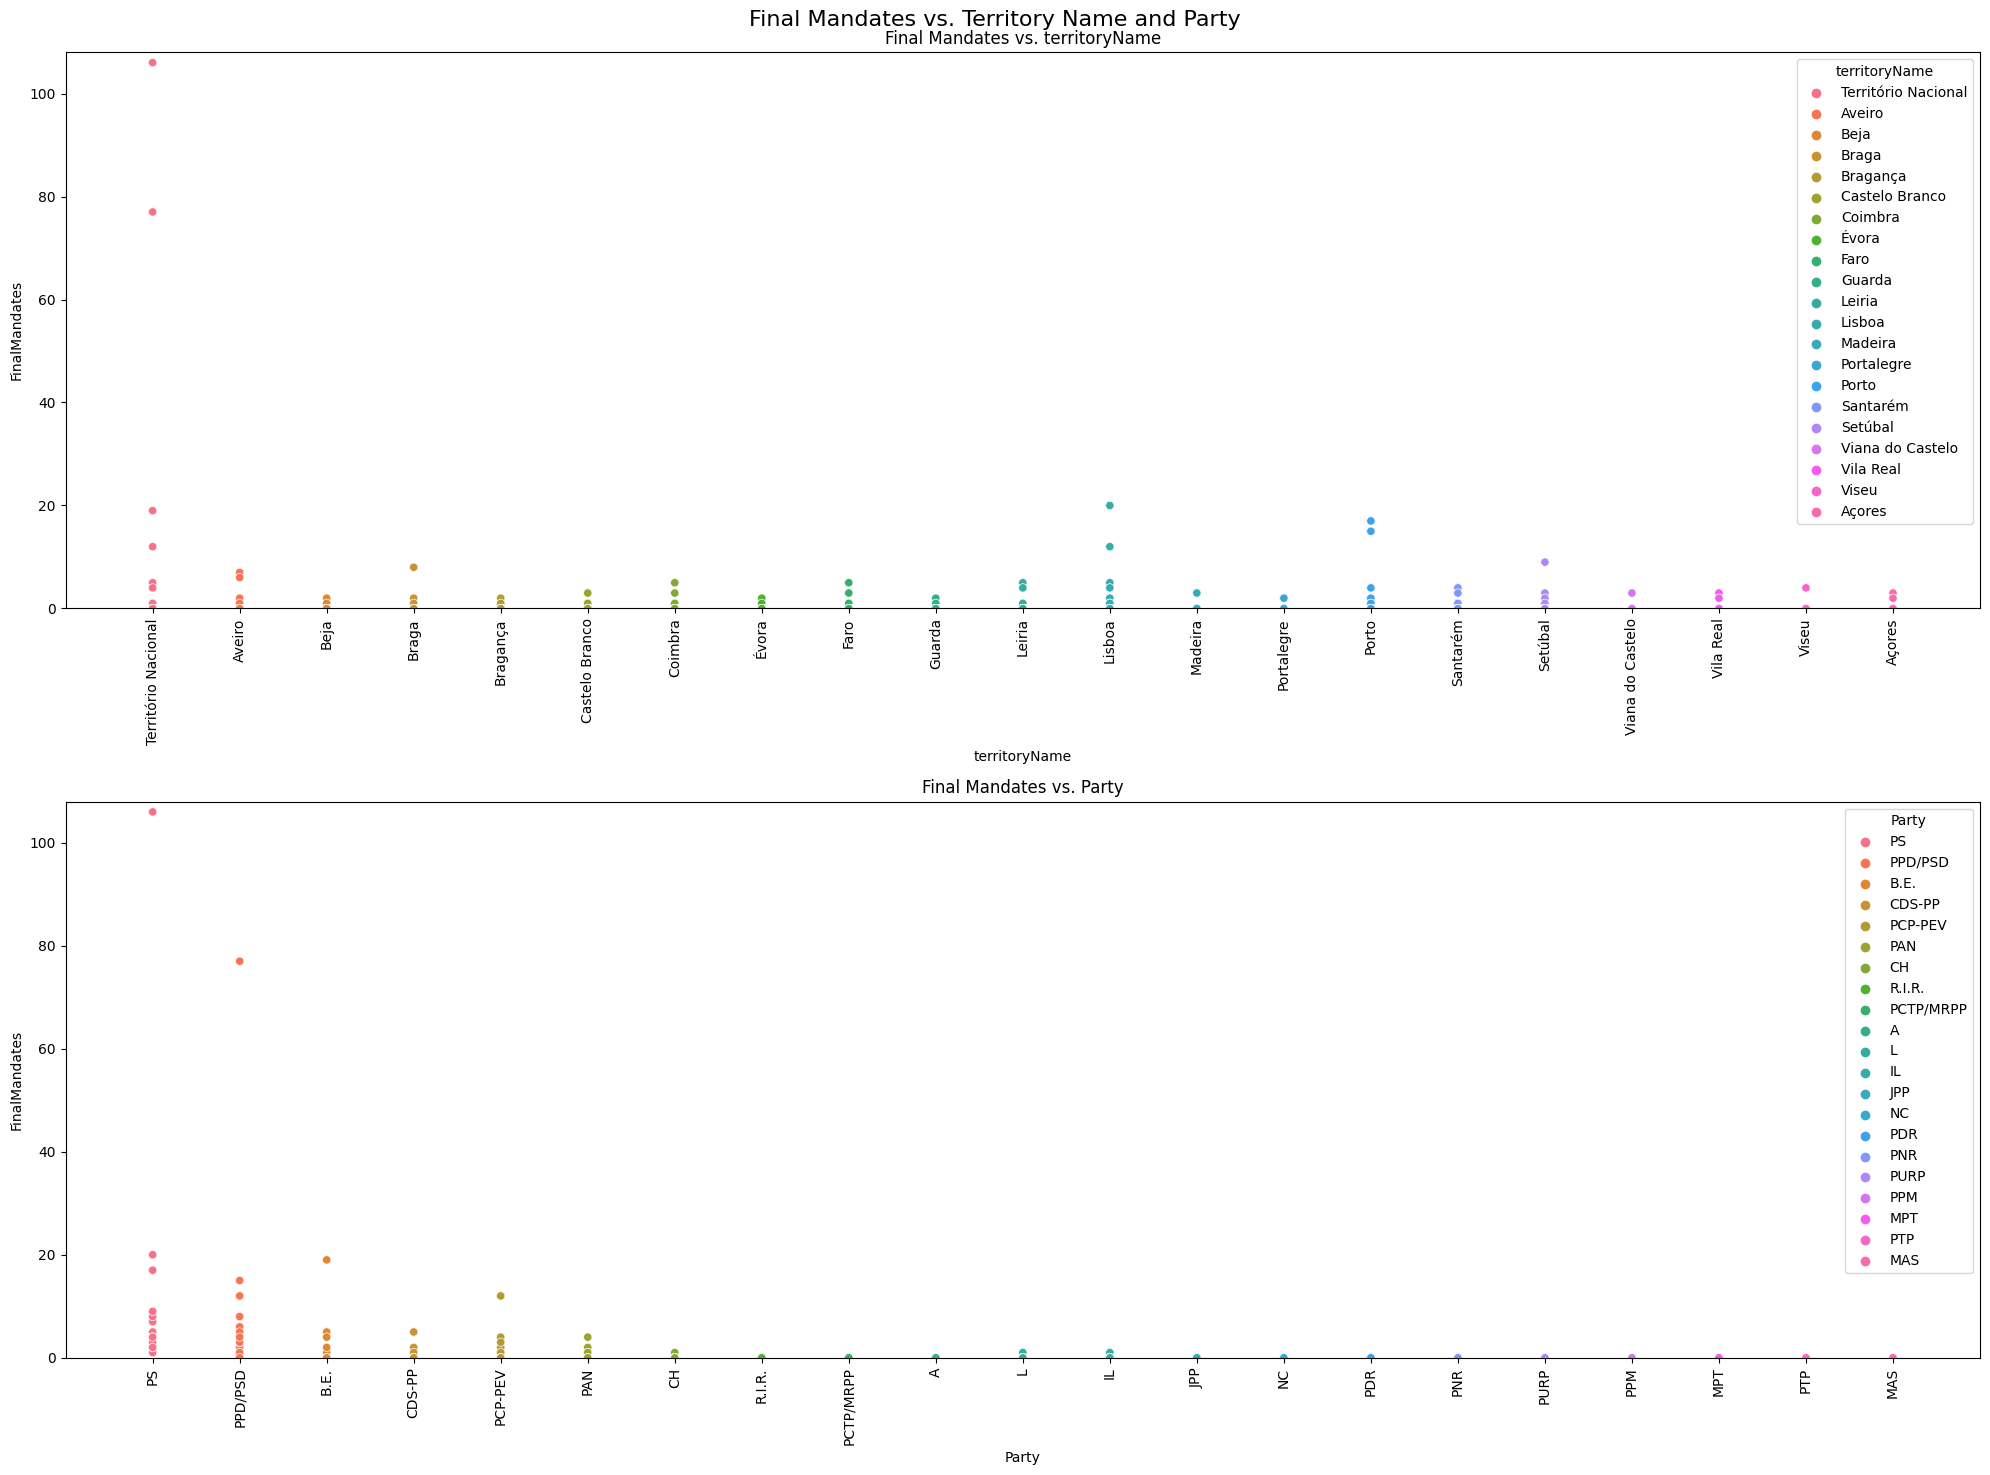

In [17]:
cols = ["territoryName", "Party"]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[20, 15])

for col, ax in zip(cols, axes.flatten()):
    sns.scatterplot(x=col, y="FinalMandates", data=data, hue=col, ax=ax)
    ax.set_title(f"Final Mandates vs. {col}")
    ax.set_ylim(0, data["FinalMandates"].max() + 2)
    ax.tick_params(axis='x', labelrotation=90)

fig.suptitle("Final Mandates vs. Territory Name and Party", fontsize=16)
plt.tight_layout()
plt.show()


### Encoding categorial variables

In [18]:
# get the categorials variables

object_columns = list(data.select_dtypes(include=['object']).columns)
object_columns

['time', 'territoryName', 'Party']

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in object_columns:
    data[col] = le.fit_transform(data[col])
data.head()


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


### Selecting the best features with SelectKBest

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['FinalMandates'], axis=1),
    data['FinalMandates'],
    test_size=0.3,
    random_state=123
)

selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
X_new = selector.transform(X_train)


In [21]:
features = X_train.columns[selector.get_support()]
features

Index(['numParishes', 'numParishesApproved', 'nullVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'Mandates', 'Percentage',
       'validVotesPercentage', 'Votes', 'Hondt'],
      dtype='object')

In [22]:
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,0,16,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


In [24]:
import numpy as np
features = X_train.columns[selector.get_support()]
final_data = data[np.concatenate([features, ['FinalMandates', 'time', 'territoryName', 'Party']])]
final_data.head()


,numParishes,numParishesApproved,nullVotes,pre.nullVotes,pre.subscribedVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,time,territoryName,Party
0,3092,1081,8874,8171,813743,0,38.29,40.22,147993,94,106,0,16,17
1,3092,1081,8874,8171,813743,0,33.28,34.95,128624,81,77,0,16,15
2,3092,1081,8874,8171,813743,0,6.81,7.15,26307,16,19,0,16,1
3,3092,1081,8874,8171,813743,0,4.90,5.14,18923,12,5,0,16,2
4,3092,1081,8874,8171,813743,0,4.59,4.83,17757,11,12,0,16,11


### Checking for outliers

numParishes                AxesSubplot(0.125,0.747241;0.133621x0.132759)
numParishesApproved     AxesSubplot(0.285345,0.747241;0.133621x0.132759)
nullVotes                AxesSubplot(0.44569,0.747241;0.133621x0.132759)
pre.nullVotes           AxesSubplot(0.606034,0.747241;0.133621x0.132759)
pre.subscribedVoters    AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Mandates                   AxesSubplot(0.125,0.587931;0.133621x0.132759)
Percentage              AxesSubplot(0.285345,0.587931;0.133621x0.132759)
validVotesPercentage     AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Votes                   AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Hondt                   AxesSubplot(0.766379,0.587931;0.133621x0.132759)
FinalMandates              AxesSubplot(0.125,0.428621;0.133621x0.132759)
time                    AxesSubplot(0.285345,0.428621;0.133621x0.132759)
territoryName            AxesSubplot(0.44569,0.428621;0.133621x0.132759)
Party                   AxesSubplot(0.606034,0.428621;0.133621x0.132759)
dtype: object

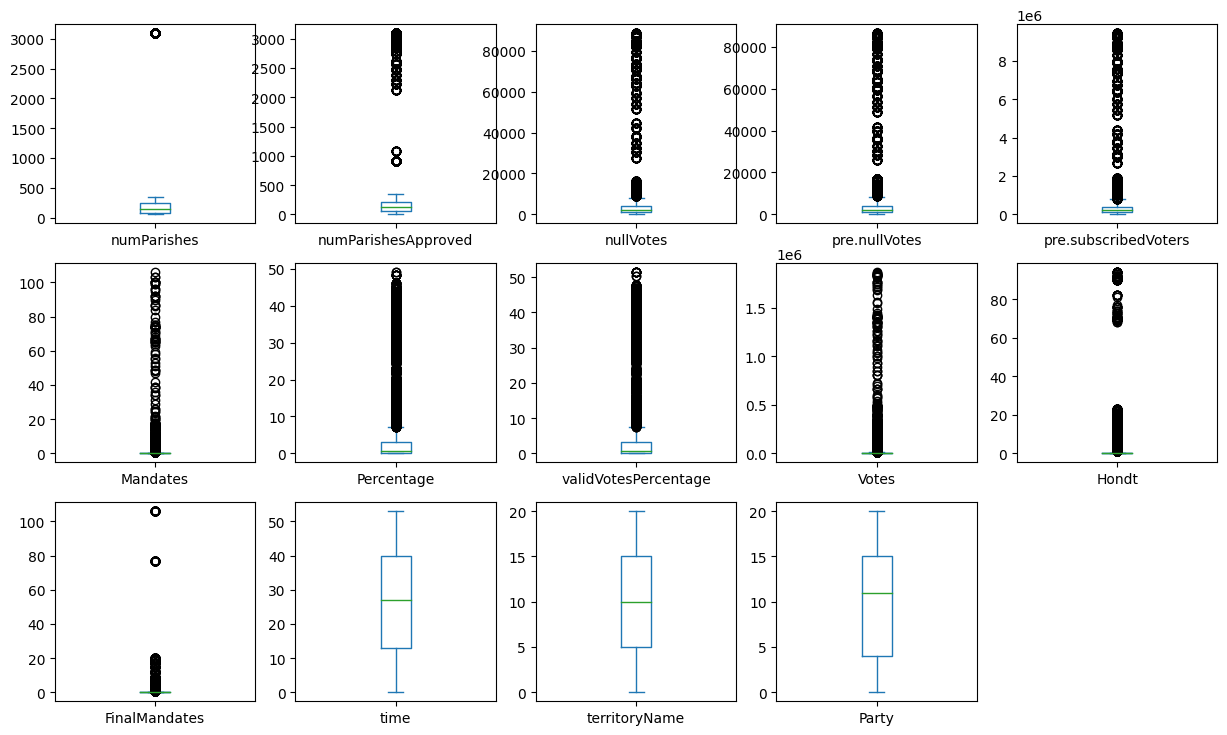

In [25]:
final_data.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [26]:
import numpy as np
from scipy.stats import zscore

z = np.abs(zscore(final_data))
threshold = 3
filtered_entries= (z < 3).all(axis=1)
final_data_ = final_data[filtered_entries]
print(final_data.shape)
print(final_data_.shape)

(21643, 14)
(19419, 14)


In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Split the dataset into feature matrix (x) and target variable (y)
x = final_data_.drop(columns=['FinalMandates'])
y = final_data_[['FinalMandates']]

# Standardize the feature matrix using StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)
df_x = pd.DataFrame(x_std, columns=x.columns)

# Split the standardized data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.3, random_state=123)


In [29]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_train, y_train)
    predm = model.predict(x_test)
    print('Score of', model, 'is:', score)
    print('MAE:', mean_absolute_error(y_test, predm))
    print('MSE:', mean_squared_error(y_test, predm))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, predm)))
    print('R2 score:', r2_score(y_test, predm))
    print('*' * 100)
    print('\n')

# Define models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()

# Evaluate models
evaluate_model(linear_reg, x_train, x_test, y_train, y_test)
evaluate_model(decision_tree_reg, x_train, x_test, y_train, y_test)


Score of LinearRegression() is: 0.9863334711914694
MAE: 0.0435359702289278
MSE: 0.030458090130998185
RMSE: 0.1745224631129133
R2 score: 0.9822834327877329
****************************************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 0.0005149330587023687
MSE: 0.0005149330587023687
RMSE: 0.02269213649488229
R2 score: 0.9997004787199367
****************************************************************************************************




In [37]:
model = DecisionTreeRegressor()
parameters = {'criterion': ['squared_error'], 'max_depth': np.arange(2, 11)}

clf = GridSearchCV(model, parameters, cv=5)
clf.fit(df_x, y)

# Get the best parameters found by GridSearchCV
best_params = clf.best_params_

print("Best parameters for DecisionTree Regressor:")
print(best_params)


Best parameters for DecisionTree Regressor:
{'criterion': 'squared_error', 'max_depth': 5}


In [39]:
best_params['criterion']

'squared_error'

In [40]:

# Define function to evaluate model performance
def evaluate_model(model, x_train, y_train, y_test, y_pred):
    metrics = {}
    metrics['score'] = model.score(x_train, y_train)
    metrics['mean_absolute_error'] = mean_absolute_error(y_test, y_pred)
    metrics['mean_squared_error'] = mean_squared_error(y_test, y_pred)
    metrics['root_mean_squared_error'] = np.sqrt(mean_squared_error(y_test, y_pred))
    metrics['r2_score'] = r2_score(y_test, y_pred)
    return metrics

# Fit RandomForestRegressor with best hyperparameters
model = DecisionTreeRegressor(max_depth=10, criterion='squared_error')
model.fit(x_train, y_train)

# Make predictions on test set
y_pred_dtr = model.predict(x_test)

# Evaluate model performance
dtr_metrics = evaluate_model(model, x_train, y_train, y_test, y_pred_dtr)

# Print evaluation metrics
print('DecisionTreeRegressor evaluation metrics:')
for metric, value in dtr_metrics.items():
    print(f'{metric}: {value:.3f}')


DecisionTreeRegressor evaluation metrics:
score: 1.000
mean_absolute_error: 0.002
mean_squared_error: 0.001
root_mean_squared_error: 0.033
r2_score: 0.999


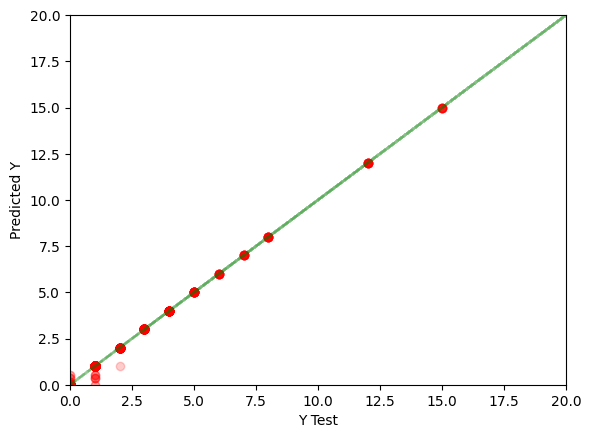

In [41]:
#Plotting our prediction vs test results with RFR model 
plt.scatter(x=y_test,y=y_pred_dtr,marker= "o",color="red",alpha=0.2)
plt.plot(x,x,"g--",alpha=0.1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')